In [2]:
# Path setup

import sys
repo_root = "../" # Change this if running the notebook from a different directory
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

# Basic generation

In [ ]:
# Imports (may take some time on the first run)

from node import SMILESStringNode
from transition import JensenTransition
from reward import LogPReward
from policy import UCT
from filter import ValidityFilter, RadicalFilter
from generator import MCTS

/opt/anaconda3/envs/v3env-m/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.


In [ ]:
# Set up generator (without YAML)
# To use YAML, refer to generation.ipynb and config/generation/mcts_example.yaml

benzene = SMILESStringNode.node_from_key("c1ccccc1")
uct = UCT(c=0.1, best_rate=0.9) # Hover over "UCT" to see its available arguments, typpes, default values, and descriptions (may not be supported in all IDEs)
jensen_transition = JensenTransition()
reward = LogPReward()
filters = [ValidityFilter(), RadicalFilter()] # ValidityFilter checks whether the molecule is valid. Since other filters and rewards typically assume validity and do not recheck it, this filter should usually be applied first in molecular generation.

generator = MCTS(root=benzene, transition=jensen_transition, reward=reward, filters=filters, filter_reward=[-1,0], policy=uct,
                 info_interval=100, output_dir="generation_result/tutorial")

In [5]:
# Start generation

generator.generate(max_generations=1000, time_limit=60) # Stops generation when either the number of generated nodes reaches 1000 or 60 seconds have passed. 
# Each generated molecule is logged to a CSV file in the output directory as soon as it is generated.

Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.1892, node: C=CC=CC=C
<Best reward updated> 2 - time: 0.04, reward: 0.1969, node: Cc1ccccc1
<Best reward updated> 4 - time: 0.04, reward: 0.2107, node: CC=CC=CC
<Best reward updated> 5 - time: 0.04, reward: 0.2401, node: Brc1ccccc1
<Best reward updated> 13 - time: 0.04, reward: 0.2994, node: BrSc1ccccc1
<Best reward updated> 61 - time: 0.92, reward: 0.3106, node: Brc1ccccc1Br
100 - time: 1.05, average over 100: 0.2074
200 - time: 1.41, average over 100: 0.2024
<Best reward updated> 240 - time: 1.48, reward: 0.3239, node: C=CC(Br)=CC=CBr
<Best reward updated> 245 - time: 1.58, reward: 0.3299, node: CC(Cl)=CC=C(C)Br
<Best reward updated> 246 - time: 1.60, reward: 0.3589, node: Clc1cc(Cl)cc(Br)c1
300 - time: 2.44, average over 100: 0.2453
<Best reward updated> 372 - time: 2.97, reward: 0.3671, node: BrSc1ccccc1Br
<Best reward updated> 377 - time: 2.97, reward: 0.3683, node: Clc1c(Br)cccc1Br
400 - time: 2.98, average ov

number of generated nodes: 1000
valid rate: 1.0
unique rate: 0.3497726477789437
node_per_sec: 185.151959718374
best_reward: 0.441151778239959
average_reward: 0.27638380123433715
top_10_auc: 0.03461700178746579


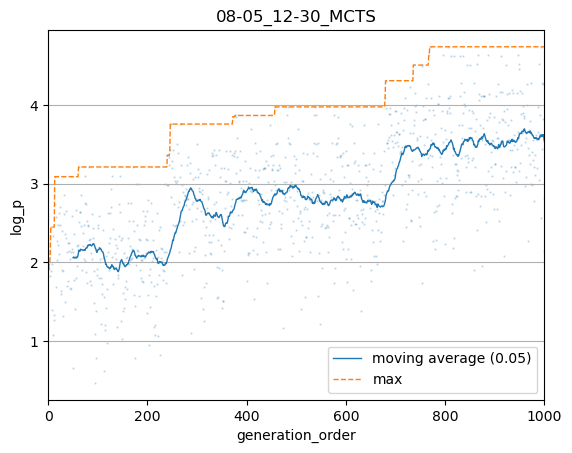

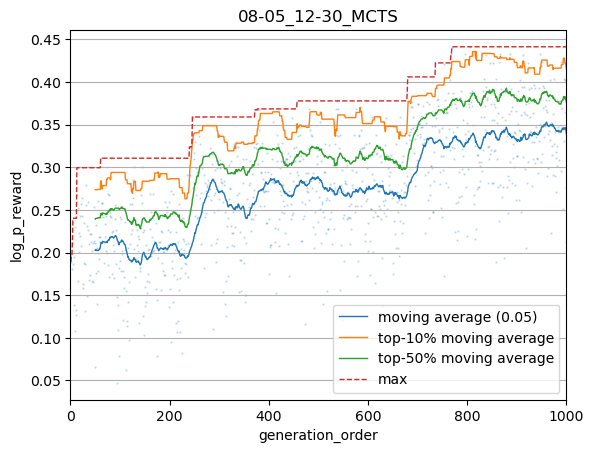

In [7]:
# Analyze and plot results

generator.analyze()
generator.plot(moving_average_window=0.05, reward_top_ps=[0.1, 0.5]) # Plot the objective values and final reward for the generated molecules. The plots will also be saved to the output directory.

Generation complete! The following cells are optional.

For generations using YAML files, use generation.ipn